In [130]:
import os
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
import torchvision.transforms.functional as fn
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from PIL import Image


In [131]:
CONFIG = {
    "dataset": {
        "img_dir": "",
        "annotations_file": "data/labels.csv",
    },
    "dataloader": {
        "batch_size": 50,
    }
}

In [132]:
class MTGCardsDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = np.array(self.img_labels.iloc[idx, [1,2,3,4]].values, dtype=float)
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [138]:
transform_pipe = transforms.Compose([
    transforms.Resize([500,500]),
    transforms.ToPILImage(),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
    transforms.ToTensor()
])

In [139]:
test_dataset = MTGCardsDataset(annotations_file=CONFIG["dataset"]["annotations_file"], img_dir=CONFIG["dataset"]["img_dir"], transform=transform_pipe)
test_dataloader = DataLoader(test_dataset, batch_size=CONFIG["dataloader"]["batch_size"])

c:\Users\vikio\anaconda3\envs\nsiete_pytorch_project\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


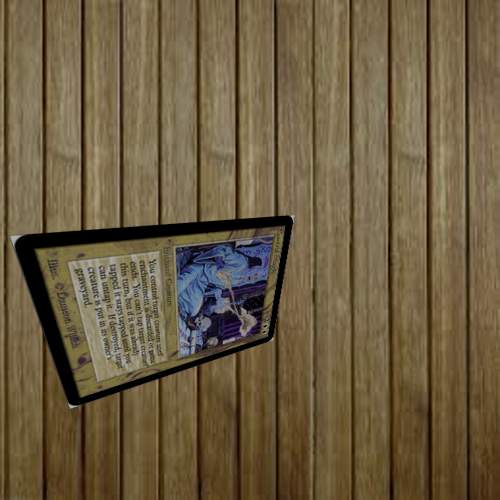

In [140]:
images, labels = next(iter(test_dataloader))
fn.to_pil_image(images[0])

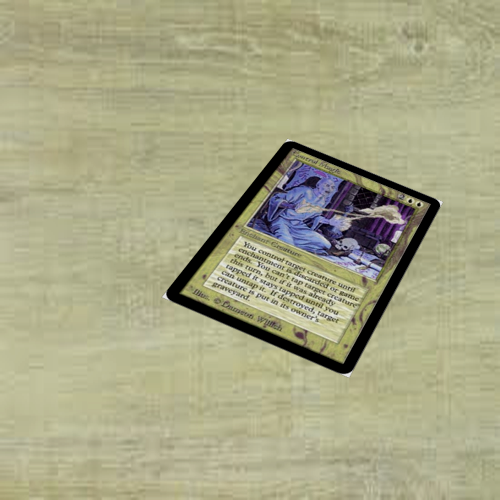

In [141]:
fn.to_pil_image(images[1])

c:\Users\vikio\anaconda3\envs\nsiete_pytorch_project\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


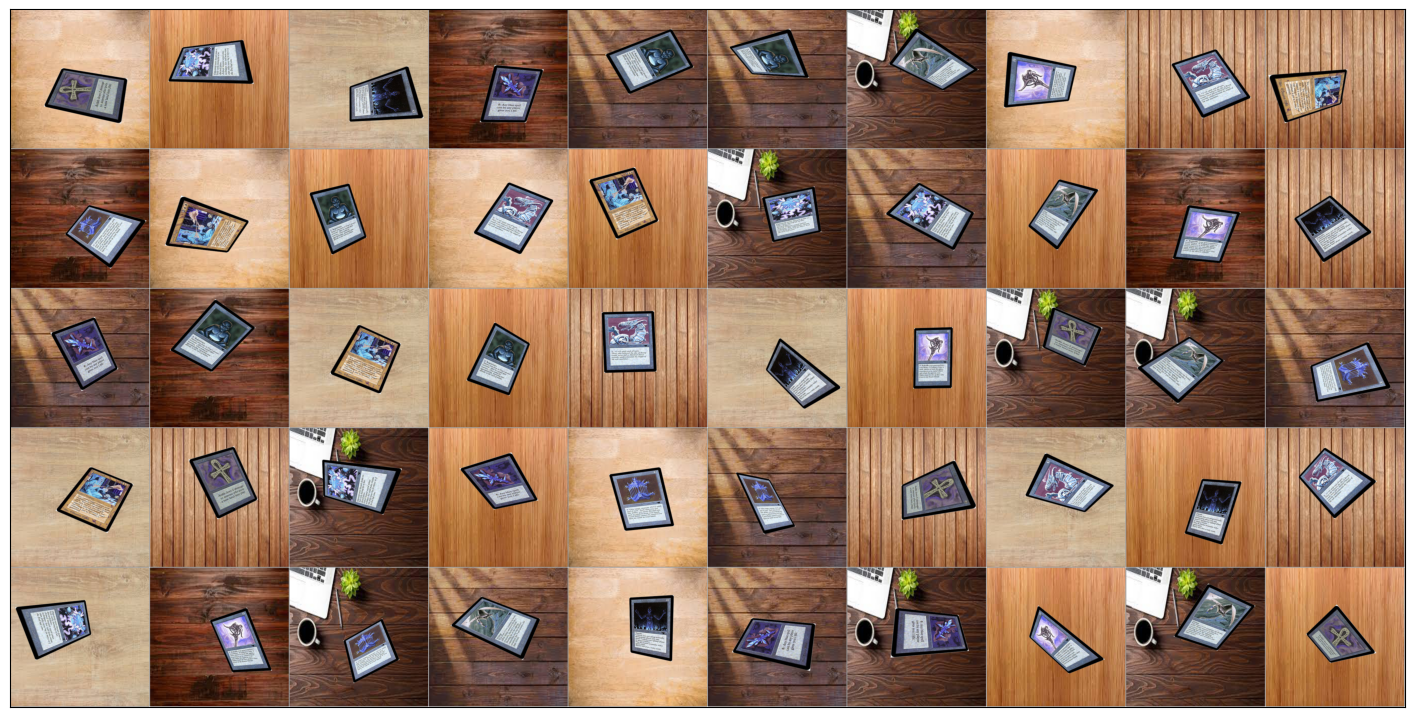

In [142]:
display_pipe = transforms.Compose([
    transforms.Resize([500,500]),
])

display_dataset = MTGCardsDataset(annotations_file=CONFIG["dataset"]["annotations_file"], img_dir=CONFIG["dataset"]["img_dir"], transform=display_pipe)
display_dataloader = DataLoader(display_dataset, batch_size=CONFIG["dataloader"]["batch_size"], shuffle=True)

for images, labels in display_dataloader:
    fig, ax = plt.subplots(figsize=(18,10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=10).permute(1, 2, 0))
    break